In [ ]:
docker run --entrypoint /bin/bash -v "/Users/aj/Dropbox (Partners HealthCare)/Data/PCA/F8 image analysis/":/data -w /data -p 8888:8888 -it pinellolab/stream:1.0

jupyter notebook --ip 0.0.0.0 --port 8888 --no-browser --allow-root

In [ ]:
!pip install scanpy==1.7.1
!pip install anndata==0.7.4
!pip install networkx==2.3.0
!pip install tzlocal

In [1]:
# Lib
import stream as st
import scanpy as sc
import os
import pandas as pd
import anndata as ad

/opt/anaconda3/envs/env_stream/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:17: FutureWarning:

pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.



In [2]:
# import data
#adata = sc.read_h5ad('f8_tumor_min.h5ad')

In [3]:
adata = sc.read_h5ad('/Users/aj/Dropbox (Partners HealthCare)/Data/PCA/F8 image analysis/f8_tumor_min_log.h5ad')

In [4]:
st.set_workdir(adata,'./stream_result')
subset_genes = ['SOX10', 'S100B','MITF','PCNA','HLADPB1', 'S100A','CCNA2', 'CCND1', 'CD63', 'KI67']

Saving results in: ./stream_result


In [5]:
exp = pd.DataFrame(adata.raw.X, columns = adata.var.index, index = adata.obs.index)
adata.raw = ad.AnnData (exp [subset_genes]) # subset adata raw
adata = adata[:,subset_genes] # subset adata regular

/opt/anaconda3/envs/env_stream/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



9 variable genes are selected


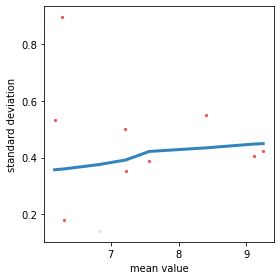

In [6]:
st.select_variable_genes(adata,loess_frac=1,percentile=0)

In [7]:
adata.uns['var_genes']

Index(['SOX10', 'S100B', 'MITF', 'PCNA', 'HLADPB1', 'S100A', 'CCND1', 'CD63',
       'KI67'],
      dtype='object')

In [8]:
adata.var.index

Index(['SOX10', 'S100B', 'MITF', 'PCNA', 'HLADPB1', 'S100A', 'CCNA2', 'CCND1',
       'CD63', 'KI67'],
      dtype='object')

In [9]:
adata.obs['phenotype_final'] = adata.obs['phenotype_final'].astype('str')

In [10]:
adata.obs['phenotype_final']

unmicst-1_750_701437    T2
unmicst-1_750_677412    T3
unmicst-1_750_631335    T2
unmicst-1_750_220164    T2
unmicst-1_750_548198    T3
                        ..
unmicst-1_750_469767    T2
unmicst-1_750_610467    T2
unmicst-1_750_524378    T3
unmicst-1_750_999859    T3
unmicst-1_750_114315    T1
Name: phenotype_final, Length: 20000, dtype: object

In [11]:
st.dimension_reduction(adata,method='se',feature='var_genes',n_components=4,n_neighbors=15,n_jobs=4)

feature var_genes is being used ...
4 cpus are being used ...


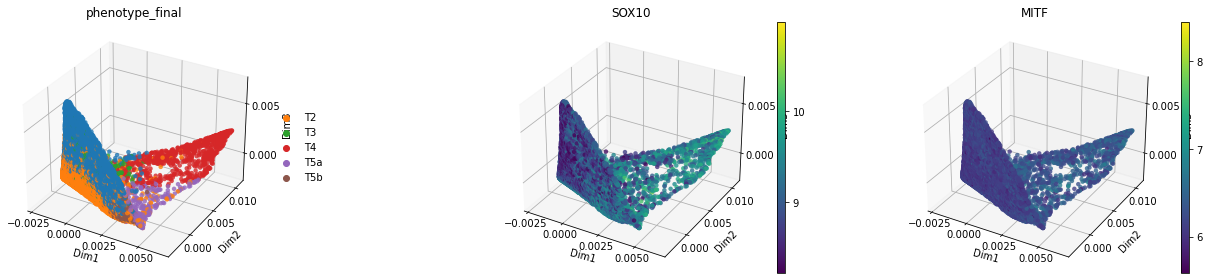

In [12]:
st.plot_dimension_reduction(adata,color=['phenotype_final','SOX10','MITF'],
                            n_components=3,show_graph=False,show_text=False)

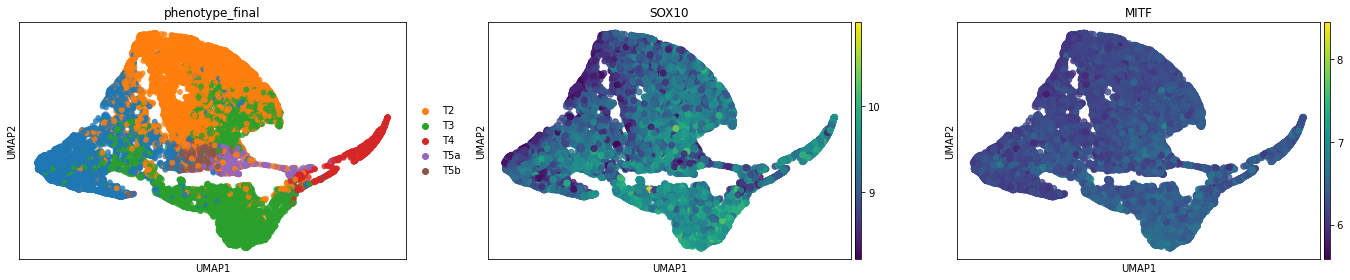

In [13]:
st.plot_visualization_2D(adata,method='umap',n_neighbors=30,
                         color=['phenotype_final','SOX10','MITF'],use_precomputed=False)

### Trajectory

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 7
Calculatng minimum spanning tree...
Number of initial branches: 3


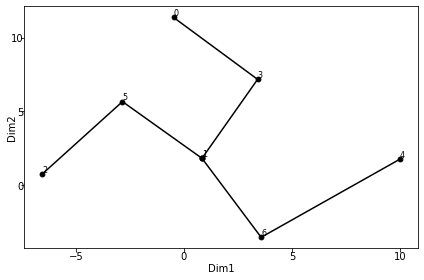

In [14]:
### by setting use_vis=True, we use the manifold from `plot_visualization_2D()` to infer trajectories
st.seed_elastic_principal_graph(adata,n_clusters=7,use_vis=True)
#st.plot_dimension_reduction(adata,color=['phenotype_final','SOX10','MITF'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=True)

In [15]:
st.elastic_principal_graph(adata,epg_alpha=0.01,epg_mu=0.05,epg_lambda=0.01)
#st.plot_dimension_reduction(adata,color=['phenotype_final','SOX10','MITF'],n_components=2,show_graph=True,show_text=False)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 20000 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
7
 
8
 
9
 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

4||50
	
2.053
	
50
	
49
	
40
	
4
	
0
	
0
	
1.179
	
1.074
	
0.9732
	
0.9756
	
0.7503
	
0.1238
	
6.191
	
309.6
	
0




/opt/anaconda3/envs/env_stream/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


/opt/anaconda3/envs/env_stream/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Error in dyn.load(file, DLLpath = DLLpath, ...) : 
  unable to load shared object '/opt/anaconda3/envs/env_stream/lib/R/library/stringi/libs/stringi.dylib':
  dlopen(/opt/anaconda3/envs/env_stream/lib/R/library/stringi/libs/stringi.dylib, 6): Library not loaded: @rpath/libicui18n.58.dylib
  Referenced from: /opt/anaconda3/envs/env_stream/lib/R/library/stringi/libs/stringi.dylib
  Reason: image not found




RRuntimeError: Error in dyn.load(file, DLLpath = DLLpath, ...) : 
  unable to load shared object '/opt/anaconda3/envs/env_stream/lib/R/library/stringi/libs/stringi.dylib':
  dlopen(/opt/anaconda3/envs/env_stream/lib/R/library/stringi/libs/stringi.dylib, 6): Library not loaded: @rpath/libicui18n.58.dylib
  Referenced from: /opt/anaconda3/envs/env_stream/lib/R/library/stringi/libs/stringi.dylib
  Reason: image not found


In [ ]:
###Extend leaf branch to reach further cells 
st.extend_elastic_principal_graph(adata, epg_ext_mode='WeigthedCentroid',epg_ext_par=0.8)
st.plot_dimension_reduction(adata,color=['phenotype_final','MITF'],n_components=2,show_graph=True,show_text=True,vmin=6,vmax=8)
#st.plot_branches(adata,show_text=True)

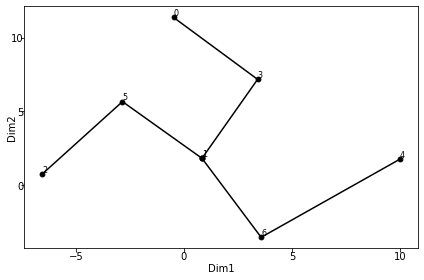

In [20]:
st.plot_branches(adata,show_text=True)

In [16]:
bdata = adata.copy()

In [17]:
adata.X = adata.raw.X

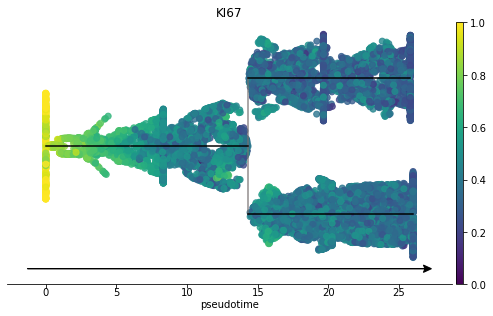

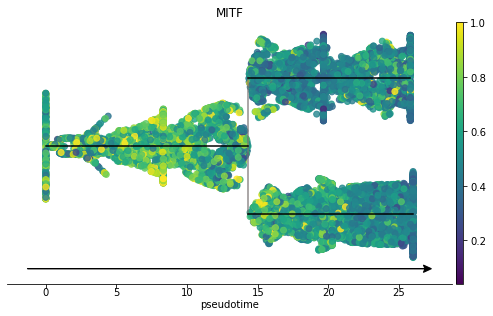

In [21]:
st.plot_stream_sc(adata,root='S2',color=['KI67','MITF'],
                  dist_scale=0.5,show_graph=True,show_text=False)

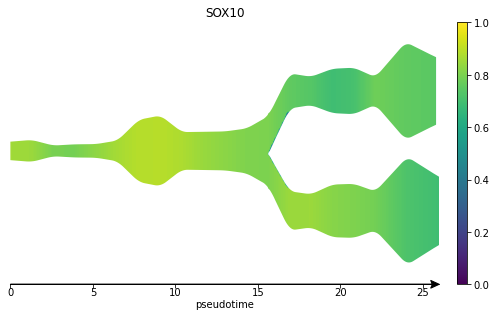

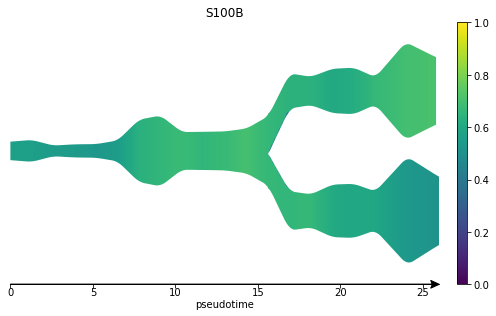

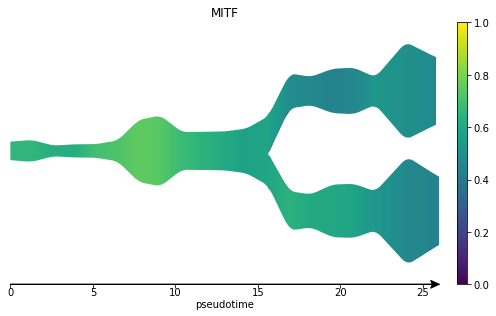

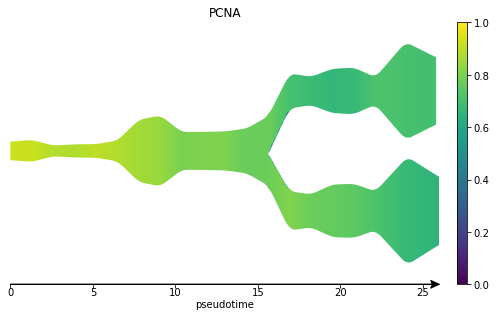

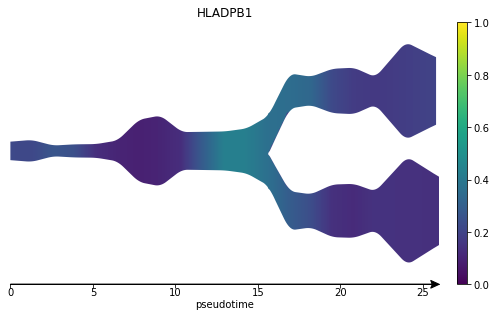

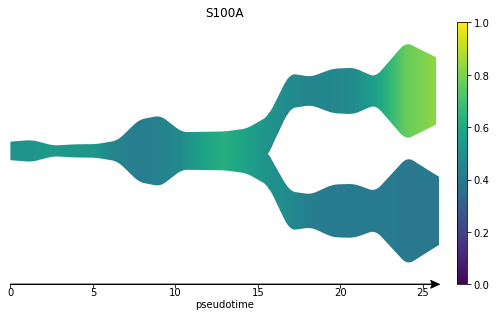

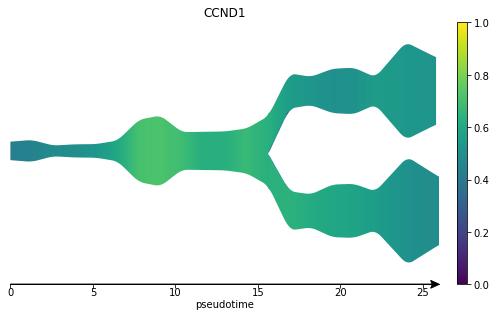

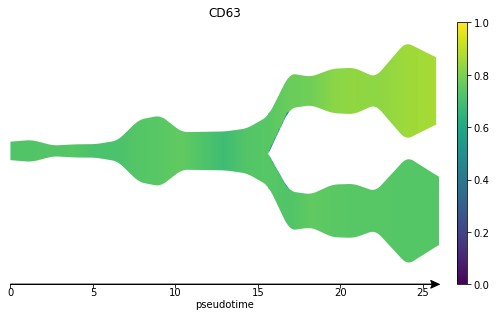

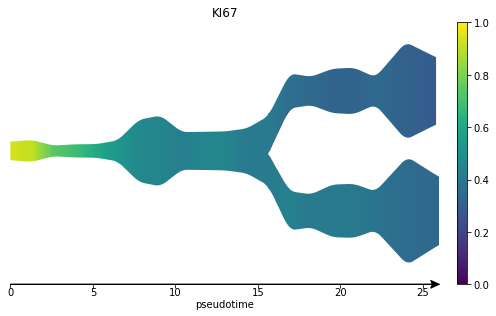

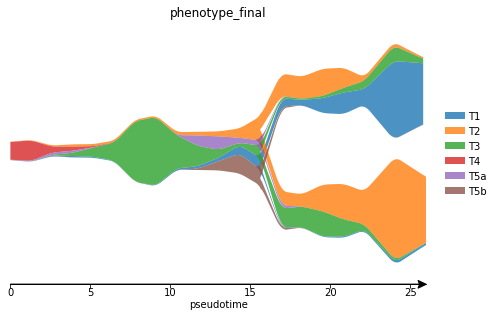

In [22]:
st.plot_stream(adata,root='S2',
               color=['SOX10', 'S100B', 'MITF', 'PCNA', 
                      'HLADPB1', 'S100A', 'CCND1', 'CD63','KI67','phenotype_final'],
               vmin=0, vmax=1, factor_min_win=1.5)

In [ ]:
st.detect_leaf_markers(adata,marker_list=adata.uns['var_genes'],cutoff_zscore=1.0,cutoff_pvalue=0.01,
                       root='S3',n_jobs=4)

In [ ]:
adata.uns['leaf_markers_all'].head()

In [ ]:
st.detect_transition_markers(adata,marker_list=adata.uns['var_genes'],cutoff_spearman=0.4,cutoff_logfc=0.25,
                             root='S3',n_jobs=4)

In [ ]:
st.plot_transition_markers(adata,fig_size=(10,5))